# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

* Manipulate columns in DataFrames (df.rename, df.drop)
* Manipulate the index in DataFrames (df.reindex, df.drop, df.rename)
* Manipulate column datatypes

## Let's get started!

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
df = pd.read_csv('turnstile_180901.txt')
print(len(df))
df.tail()
# df = df.rename(columns={'DATE' : 'date', 'STATION':'SMH'})
# df.head()


197625


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
197620,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,05:00:00,REGULAR,5554,348
197621,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,09:00:00,REGULAR,5554,348
197622,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,13:00:00,REGULAR,5554,348
197623,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,17:00:00,REGULAR,5554,348
197624,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,08/31/2018,21:00:00,REGULAR,5554,348


## Rename all the columns to lower case

In [3]:
# #Your code heredf = 
# df.rename(columns={'DATE' : 'date', 'STATION':'SMH'})
# 
# df.columns.title()
new_cols = [col.lower() for col in df.columns]
#set equal to df.columns if you want the change to take place
new_cols


['c/a',
 'unit',
 'scp',
 'station',
 'linename',
 'division',
 'date',
 'time',
 'desc',
 'entries',
 'exits                                                               ']

## Change the Index to be the Line Names

In [4]:
df = df.set_index('LINENAME')
df.head()

,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
LINENAME,,,,,,,,,,
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Painstakingly change the index back

In [5]:
df = df.reset_index() #Not that painful
df.head()

,LINENAME,C/A,UNIT,SCP,STATION,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,NQR456W,A002,R051,02-00-00,59 ST,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


## Create another column 'Num_Lines' that is a count of how many lines pass through a station. Then sort your dataframe by this column in descending order

In [6]:

df['Num_Lines'] = df.LINENAME.map(lambda x: len(x))

In [13]:
df.DATE = pd.to_datetime(df.DATE)

## Write a function to clean a column name

In [7]:
def clean(col_name):
    cleaned = col_name.strip()#Your code here; whatever you want to do to col_name. Hint: think back to str methods.
    return cleaned

In [8]:
#This is a list comprehension. It applies your clean function to every item in the list.
#We then reassign that to df.columns
#You shouldn't have to change anything here.
#Your function above should work appropriately here.
df.columns = [clean(col) for col in df.columns] 

In [10]:
#Checking the output, we can see the results.
df.columns=[clean(col) for col in df.columns]

Index(['LINENAME', 'C/A', 'UNIT', 'SCP', 'STATION', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS', 'Num_Lines'],
      dtype='object')

## Compare subway traffic by day of the week. Display this as a graph.

In [12]:
#Your code here
import matplotlib as plt


In [18]:
df.DATE = pd.to_datetime(df.DATE)

In [19]:
df['Dayofweek'] = df.DATE.dt.dayofweek

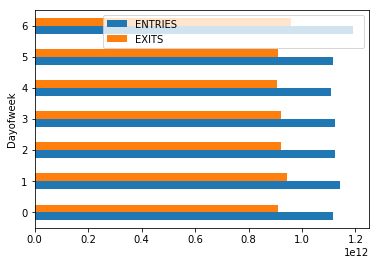

In [22]:
grouped = df.groupby('Dayofweek').sum()
grouped.plot(kind='barh')

## Is there more subway traffic on a weekend or a weekday?    Be specific in comparing magnitudes

In [23]:
df.DATE.dt.dayofweek?

In [24]:
grouped = grouped.reset_index()
grouped.head()

,Dayofweek,ENTRIES,EXITS
0,0,1114237052454,911938153513
1,1,1143313287046,942230721477
2,2,1123655222441,920630864687
3,3,1122723988662,920691927110
4,4,1110224700078,906799065337


In [25]:
grouped['IsWeekend'] = grouped.Dayofweek.map({0:False,1:False,2:False,3:False,4:False,5:True,6:True})
wkend = grouped.groupby('IsWeekend').mean()
wkend[['ENTRIES', 'EXITS']].plot(kind='barh')

KeyError: "['EXITS'] not in index"

In [ ]:
#Your code here

## Drop a couple of columns

In [ ]:
# Your code here

## Summary

Great! You practiced your data cleanup-skills using Pandas.